In [33]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer  #String to numeric.When maximum column is string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [34]:
import nltk 
nltk.download('punkt')
nltk.download('stopwords') #Stopwords = commonly used english words
from nltk.corpus import stopwords

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [35]:
data = pd.read_csv("AmazonReview.csv")
data

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1
...,...,...
24995,These cables (lightning) are far superior to m...,5
24996,This unit performs exactly as advertised. I u...,5
24997,I had the key cut at a local hardware store cu...,5
24998,I love my case I ordered from amazon. It wasn'...,5


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [37]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24999 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  24999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 585.9+ KB


In [38]:
#1,2,3->negative(i.e 0)
data.loc[data['Sentiment']<=3,'Sentiment']=0
print(data)

#4,5->positive(i.e 1)
data.loc[data['Sentiment']>3,'Sentiment']=1

                                                  Review  Sentiment
0      Fast shipping but this product is very cheaply...          0
1      This case takes so long to ship and it's not e...          0
2      Good for not droids. Not good for iPhones. You...          0
3      The cable was not compatible between my macboo...          0
4      The case is nice but did not have a glow light...          0
...                                                  ...        ...
24995  These cables (lightning) are far superior to m...          5
24996  This unit performs exactly as advertised.  I u...          5
24997  I had the key cut at a local hardware store cu...          5
24998  I love my case I ordered from amazon. It wasn'...          5
24999  Awsome!!! I loved this little speaker. It has ...          5

[24999 rows x 2 columns]


In [39]:
stp_words = stopwords.words('english')
def clean_review(review):
    clean_review = " ".join(word for word in review.split() if word not in stp_words)
    return clean_review

data['Review'] = data['Review'].apply(clean_review)
print(data.Review)

0        Fast shipping product cheaply made I brought g...
1        This case takes long ship even worth DONT BUY!!!!
2        Good droids. Not good iPhones. You cannot use ...
3        The cable compatible macbook iphone. Also conn...
4        The case nice glow light. I'm disappointed pro...
                               ...                        
24995    These cables (lightning) far superior cables m...
24996    This unit performs exactly advertised. I use c...
24997    I key cut local hardware store cut free, progr...
24998    I love case I ordered amazon. It color looked ...
24999    Awsome!!! I loved little speaker. It great sou...
Name: Review, Length: 24999, dtype: object


In [40]:
data['Sentiment'].value_counts()

Sentiment
0    15000
1     9999
Name: count, dtype: int64

Sentiment
0    15000
1     9999
Name: count, dtype: int64


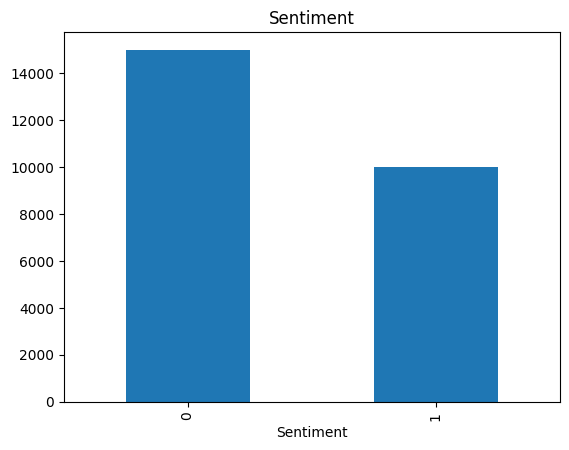

In [41]:
trans = data['Sentiment'].value_counts()
print(trans)
trans.plot.bar()
plt.title('Sentiment')
plt.xlabel("Sentiment")
plt.show()

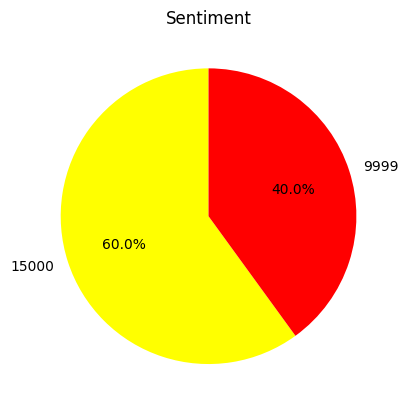

In [42]:
x = data['Sentiment'].value_counts()
y = data['Sentiment'].value_counts()

plt.pie(x,labels = y,autopct = '%1.1f%%',startangle = 90,colors = ['yellow','red'])
plt.title('Sentiment')
plt.show()

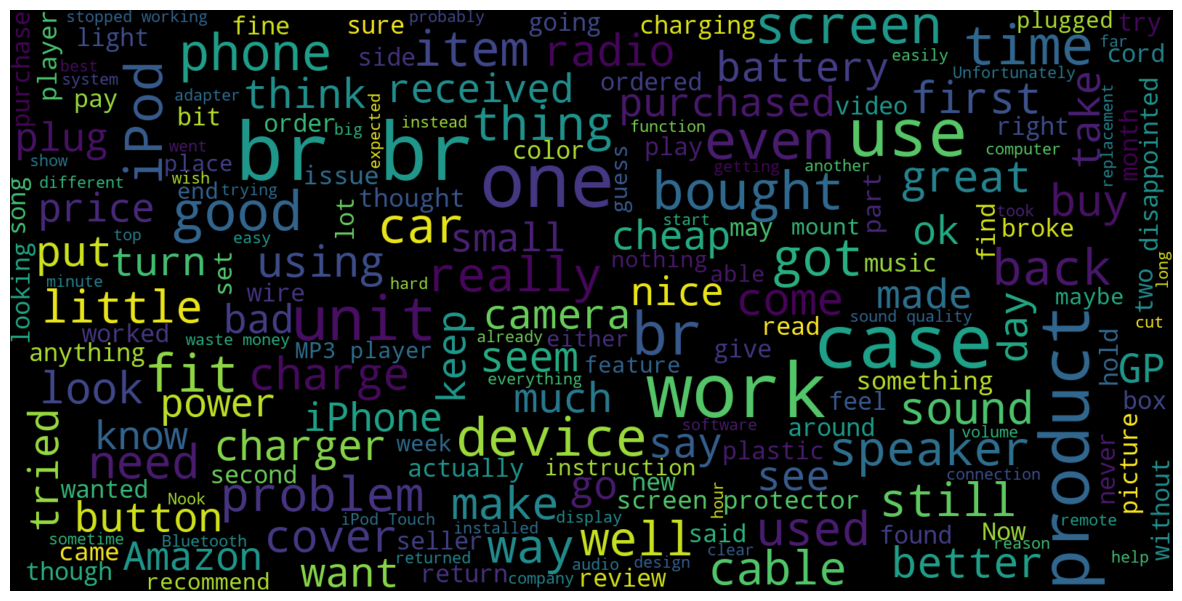

In [43]:
consolidated = ' '.join(word for word in data['Review'][data['Sentiment'] == 0].astype(str))
wordCloud = WordCloud(width = 1600,height = 800,max_font_size = 110)
plt.figure(figsize = (15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation = 'bilinear')
plt.axis('off')
plt.show()

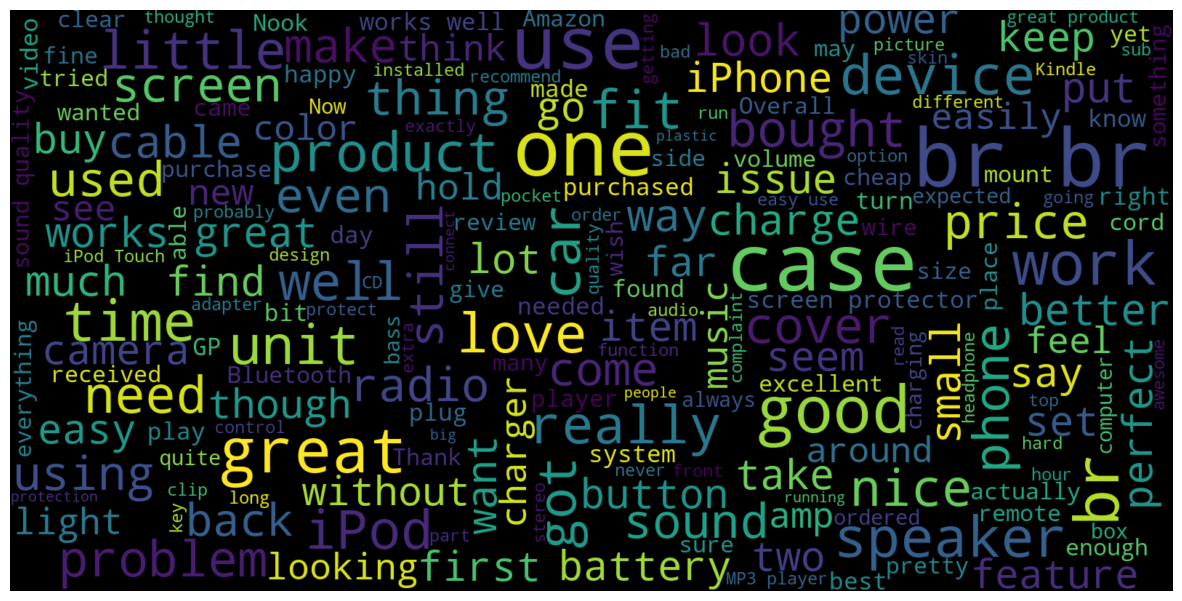

In [44]:
consolidated = ' '.join(word for word in data['Review'][data['Sentiment'] == 1].astype(str))
wordCloud = WordCloud(width = 1600,height = 800,max_font_size = 110)
plt.figure(figsize = (15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [45]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review']).toarray()
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.15171041 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,data['Sentiment'],test_size = 0.25)

In [47]:
print(x_train)
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [48]:
print(x_train.shape)
print(x_test.shape)

(18749, 2500)
(6250, 2500)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred = model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))
print(pred)

import pickle
pickle.dump(model,open('model_save.pkl','wb'))

model = pickle.load(open('model_save.pkl','rb'))

0.8144
[1 0 0 ... 1 0 0]


In [64]:
def predict_sentiment(review_text):
    #Preprocess the input review
    cleaned_review = clean_review(review_text)
    #Transfrom the review using the TF-IDF vectorizer
    transformed_review = cv.transform([cleaned_review]).toarray()
    #Predict sentiment using the trained model
    prediction = model.predict(transformed_review)

    if prediction[0] == 0:
        return 'Negative'
    else:
        return 'Positive'

#Now you can use the predict_sentiment function to classify reviews
input_review = input('Enter the review::')
result = predict_sentiment(input_review)
print(f'The sentiment of the review is {result}')

Enter the review:: Awsome!!! I loved this little speaker. It has great sound and it is super cute for my lil girl. Will positively recommend.


The sentiment of the review is Positive


In [69]:
from imblearn.over_sampling import SMOTE

#Initialize SMOTE with a sampling strategy (you can adjust it as needed)
smote = SMOTE(sampling_strategy = 'auto',random_state = 42)

#Apply SMOTE to resample the dataset
X_resampled,y_resampled = smote.fit_resample(X,data['Sentiment'])
y_resampled.value_counts()

Sentiment
0    15000
1    15000
Name: count, dtype: int64